In [550]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [551]:
# File path
file_path= 'Your Path'

In [ ]:
df=pd.read_csv(file_path)
df.head()

### Single Linear Regression

In [553]:
# LinearRegression
lm_single=LinearRegression()
lm_single

LinearRegression()

In [554]:
# Predictor and Response
# [[]] means column
# []   means series
preditor=df[['horsepower']]
response=df['price']

In [ ]:
# Fit
lm_single.fit(preditor,response)

In [ ]:
# Predict
Yhat=lm_single.predict(preditor)

In [ ]:
print(lm_single.coef_)
print(lm_single.intercept_)

### Visualization Single Linear Regression

In [558]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 47536.84138433809)

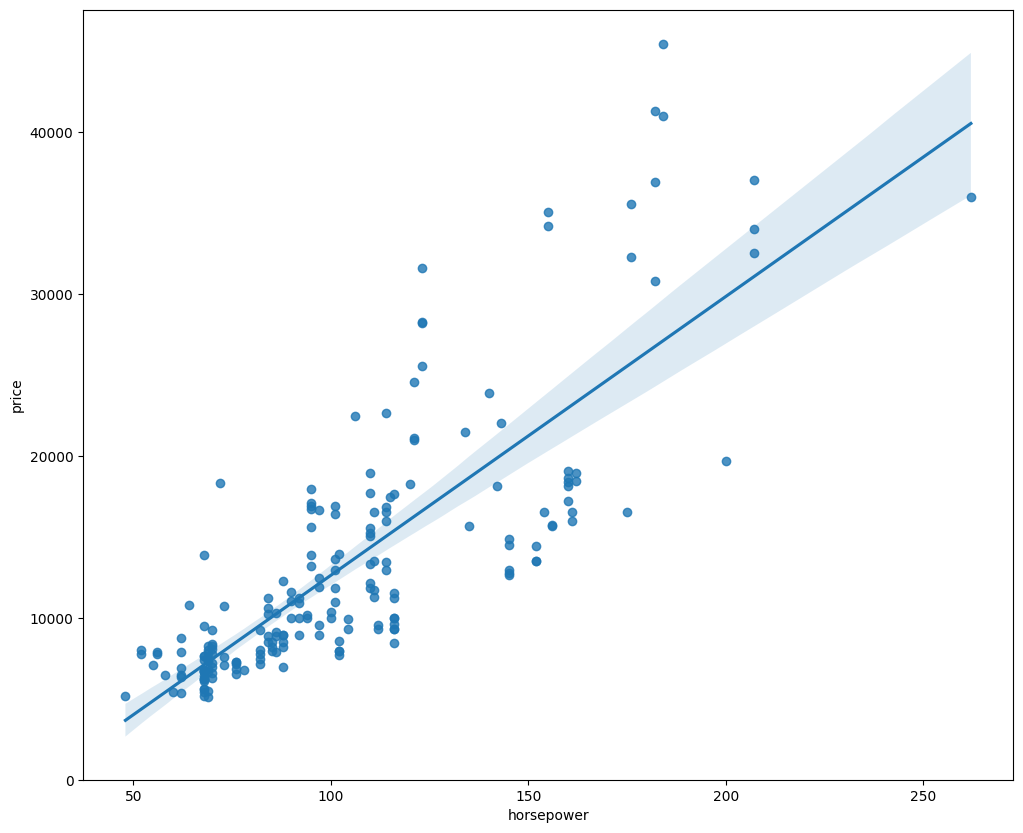

In [559]:
plt.figure(figsize=(12,10))
sns.regplot(x=df['horsepower'],y=df['price'], data=df)
plt.ylim(0,)

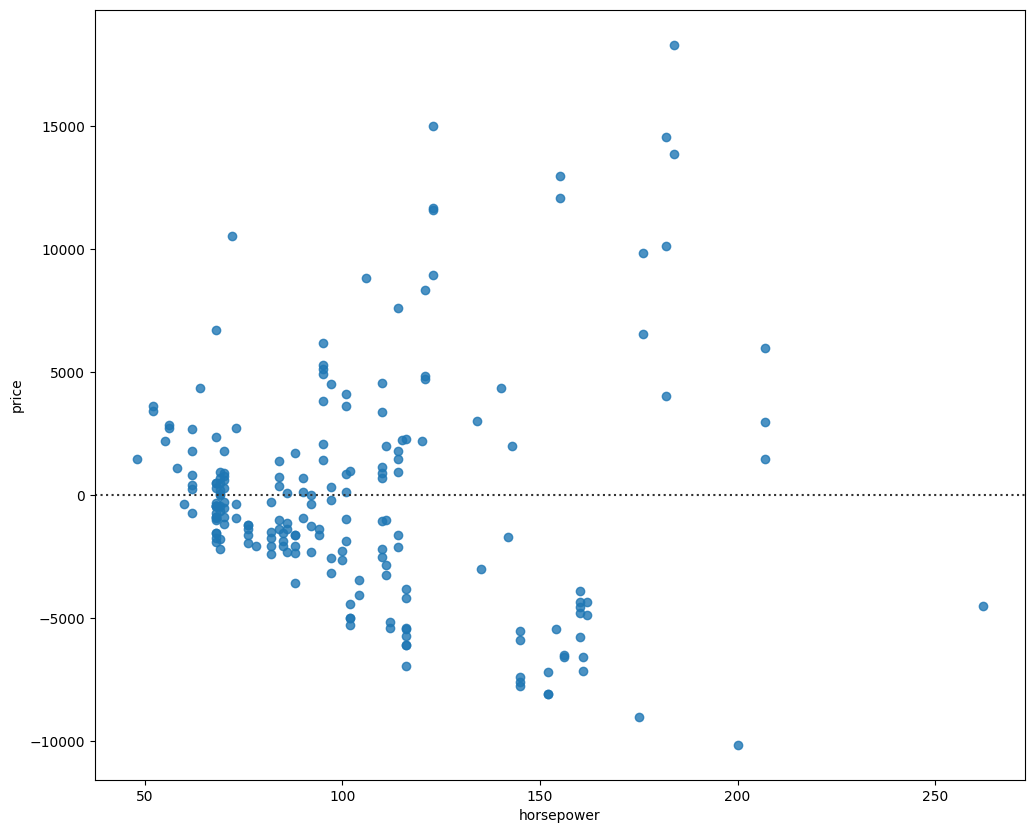

In [560]:
plt.figure(figsize=(12,10))
sns.residplot(x=df['horsepower'],y=df['price'])
plt.show()

### Measures for In-Sample Evaluation for Simple Linear Regression


In [561]:
predictor=df[['horsepower']]
response=df['price']

In [ ]:
# R^2
lm_single.fit(predictor, response)
print('R^2 =', lm_single.score(predictor,response))

In [563]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(df['price'],Yhat)
print('MSE =', mse)

### Multiple Linear Regression

In [565]:
lm_multi= LinearRegression()
lm_multi

LinearRegression()

In [566]:
predictors=df[['wheel-base','length','horsepower','bore','engine-size','curb-weight']]
responses=df['price']

In [ ]:
lm_multi.fit(predictors,responses)

In [ ]:
Yhat_multi=lm_multi.predict(predictors)

In [ ]:
print(lm_multi.coef_)
print(lm_multi.intercept_)

### Visualization Multiple Linear Regression

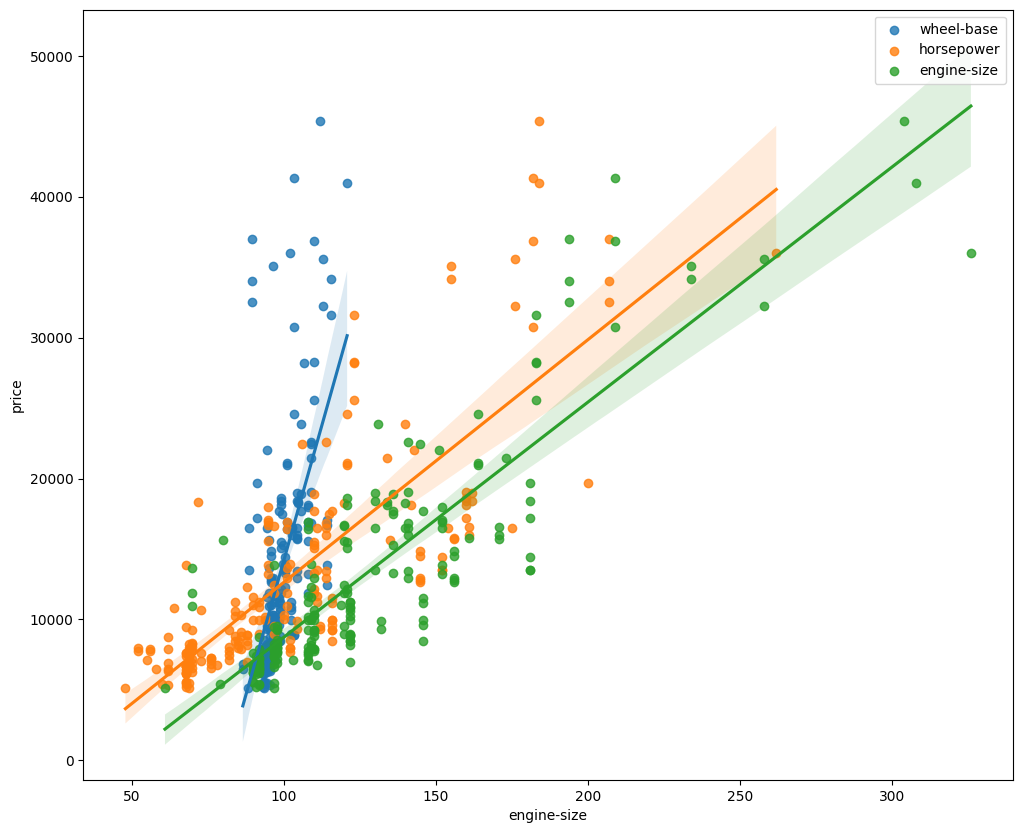

In [570]:
X_Var=['wheel-base','horsepower','engine-size']
plt.figure(figsize=(12,10))

for Var in X_Var:
    sns.regplot(x=df[Var], y=df['price'], label=Var)

plt.legend()
plt.show()

### Fitted Values & Actuall_Value

In [ ]:
plt.figure(figsize=(12,10))
Actuall_Value=sns.distplot(df['price'], hist=False, color='r',label='Actual Value')
sns.distplot(Yhat_multi, color='b', hist=False ,label="Fitted Values", ax=Actuall_Value)
plt.show()

### Measures for In-Sample Evaluation for Multiple Linear Regression


In [572]:
predictors=df[['wheel-base','length','horsepower','bore','engine-size','curb-weight']]
responses=df['price']

In [ ]:
lm_multi.fit(predictors,responses)
print('R^2=',lm_multi.score(predictors,responses))

In [ ]:
mse= mean_squared_error(responses,Yhat_multi)
print('MSE=',mse)

### Polynomial Simple Linear Regression

In [575]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(40, 250, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [576]:
X=df['horsepower']
Y=df['price']

In [577]:
# 3 is like X^3
fit= np.polyfit(X,Y,3)
predict= np.poly1d(fit)

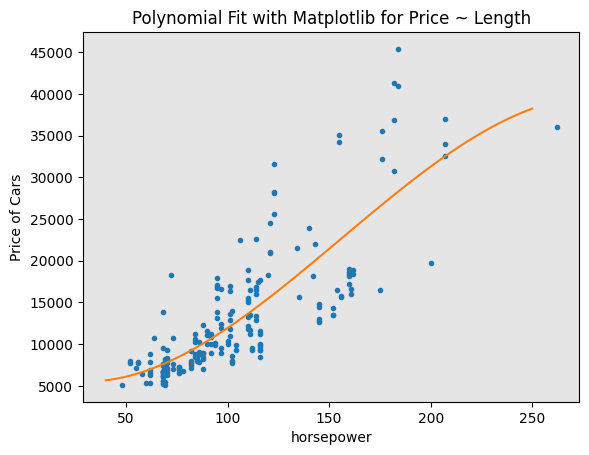

In [578]:
PlotPolly(predict,X,Y, 'horsepower')

In [579]:
from sklearn.metrics import r2_score

In [ ]:
# R^2
r_sq=r2_score(Y,predict(X))
print('R^2=',r_sq)

In [ ]:
mean_squared_error(response, predict(X))

### Polynomial Multiple Regression

In [582]:
X=['wheel-base','horsepower','engine-size']
Y=df['price']

In [583]:
# Function to plot polynomial regression
def PlotPolly(predict, independent_variable, dependent_variable, name):
    x_new = np.linspace(min(independent_variable), max(independent_variable), 100)
    y_new = predict(x_new)

    plt.plot(x_new, y_new, label=name)
    plt.title('Polynomial Fit with Matplotlib for Price')
    plt.xlabel('Variables')
    plt.ylabel('Price of Cars')

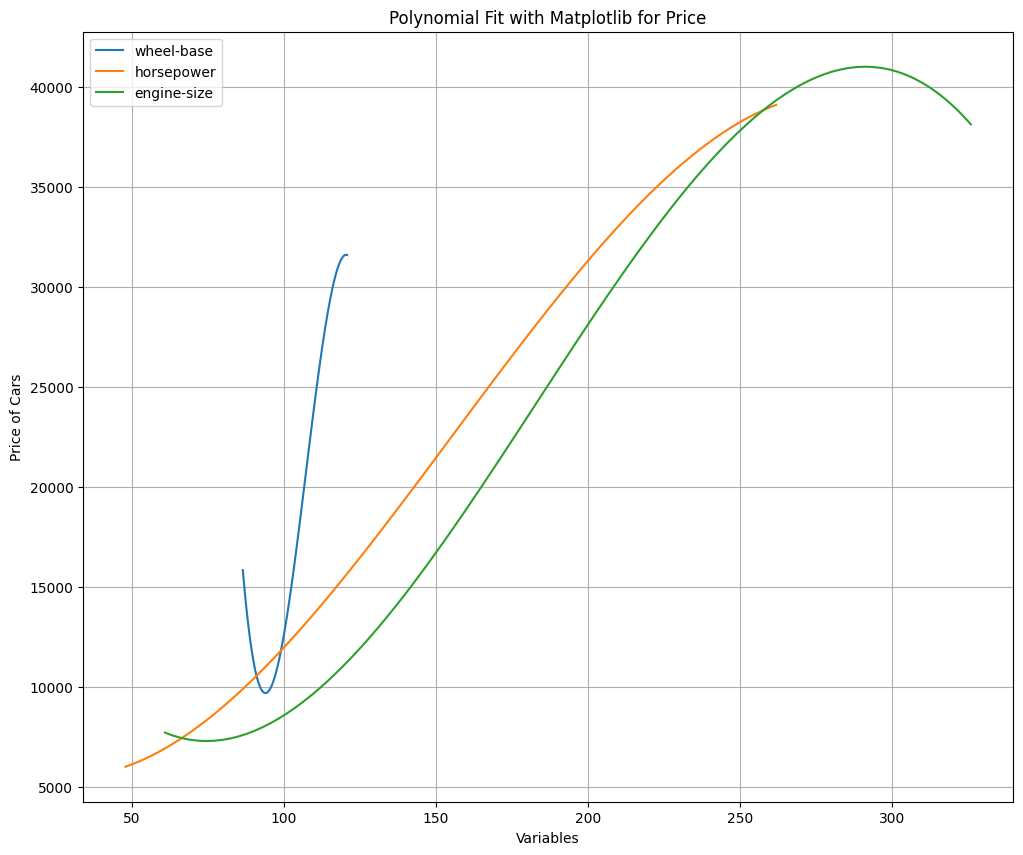

In [584]:
plt.figure(figsize=(12,10))

for Var in X:
    fit=np.polyfit(df[Var],Y,3)
    predict= np.poly1d(fit)
    PlotPolly(predict,df[Var],Y, Var)   

plt.legend()
plt.grid(True)
plt.show()

### PipeLine

In [585]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [586]:
predictors=df[['wheel-base','length','horsepower','bore','engine-size','curb-weight']]
response=df['price']

In [587]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(predictors)

In [589]:
input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [590]:
pipe=Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
predictors=predictors.astype(float)
pipe.fit(predictors,response)

In [ ]:
ypipe=pipe.predict(predictors)
ypipe[0:4]